# Deaths on the Titanic
### <span style="color:#83898b">*Understanding the role of passenger class on survival*</span>

The Titanic disaster stands in history as notorious example of civilian deaths in the early shipping period. In this assignment, I wanted to explore aspects of passengers, and how these affected their surival. The titanic sank 15th April, 1912 in the North Atlantic Ocean. It was her maiden voyage from Southampton, England, to New York City, USA.
The Titanic had an estimated 2,224 people onboard when she struck an iceberg. The ship’s lifeboat system was designed to ferry passengers to nearby rescue ships, not to hold everyone simultaneously.  With help hours away, and the ship was sinking rapidly, the 24 lifeboats were grossly insufficient, leaving no refuge for many passengers. Over 1,500 passengers died. The sinking caused global outrage over lack of lifeboats, lax regulations, and treatment of 3rd class passengers. This history suggests that the economic status of passengers may have played a role in their surivial. Further, the gneder roles of this period may also have had an effect on passenger survival as well. I will explore the relationships between these two variables, and surival status.

![Image of Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

<sup>Francis Godolphin Osbourne Stuart, Public domain, via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:RMS_Titanic_3.jpg)</sup>

## Methods
### Data Collection

A subset of data from the Titanic is maintained publicly at [Rdatasets](https://vincentarelbundock.github.io/Rdatasets/), a free online resource of general datasets [1].

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [52]:
# Load data
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

### Data Cleaning

The titanic dataset had some awkwardly named columns, which I renamed. And survival data were recoded to facilitate numeric summaries. I further modified floating point precision for concise printing outputs.

In [54]:
# Change formatting
pd.set_option('display.precision', 2)
# Rename columns
titanic.columns = ["name","survived","sex","age","class"]
# Dict-like replace
titanic = titanic.replace({'survived': {'yes': 1, 'no': 0}})

The Titanic dataset had 263 instances of missing data cells. These were removed prior to exploratory analyses.

In [55]:
# Drop all rows which contain any missing data
titanic = titanic.dropna(axis=0)

## Analyses
I will explore the relationships between passenger class, age, and gender on survival with exploratory analyses, consisting of statistical summaries and visualisations. 

### Distributions
I will begin by exploring distributions in our Titanic data. Figure below shows the distribution of passenger ages on the Titanic. As we can see, the majority of passengers were aged 40 and under.

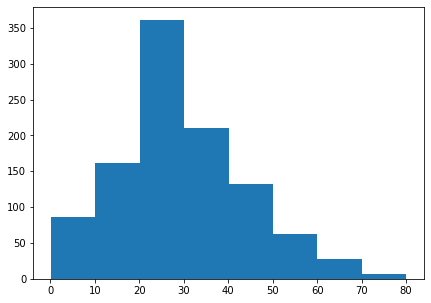

In [16]:
# Age distribution
h = titanic.age.hist(bins=8, figsize=(7,5), grid=False)

A descriptive analysis of passenger ages reveals a wide spread of age groups:

In [57]:
# Descriptive statistics of ages
ds = titanic.age.describe()
print(f"Mean age: {round(ds['mean'],2)}")
print(f"Max age: {round(ds['max'],2)}")
print(f"Min age: {round(ds['min'],2)*12}")

Mean age: 29.88
Max age: 80.0
Min age: 2.04


The Titanic had a somewhat unequal distribution of passenger gender, with more men on board than women.

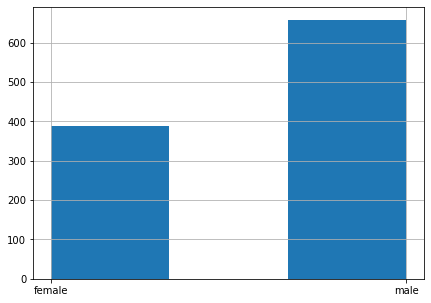

In [58]:
h=titanic.sex.hist(bins=3, figsize=(7,5))

### Age and Survival ###
An examination of age, and survival status, did not reveal intersting patterns. The average age of survivors was 28.9, while the average age of non-survivors was 30.5.

In [60]:
# Focusing on age
print(f"Survived: {round(titanic.loc[titanic.survived == 1].age.mean(),2)}")
print(f"Not Survived: {round(titanic.loc[titanic.survived == 0].age.mean(),2)}")

Survived: 28.92
Not Survived: 30.55


This suggests that age did not affect whether a passenger survived or not.

### Class and Sex on survival
It is well documented that passenger class had effect on survival status of Titanic passengers.

In [61]:
# Replace survivability for readiability
titanic = titanic.replace({'survived': {1: 'yes', 0: 'no'}})

The table below presents a summary of survival data, summarised by passenger class and sex.

In [62]:
# Grouped operations
grouped_titanic = titanic.groupby(['class','sex','survived']).size().unstack()
grouped_titanic

survived       no  yes
class sex             
1st   female    5  128
      male     98   53
2nd   female   11   92
      male    135   23
3rd   female   80   72
      male    290   59

An examination of this table, suggests that both sex and class were related to passenger survival. For example, only 5 1st-class female passengers died, while 128 survived. Conversely, 290 male 3rd-class died, relative to 59 survived. Figure 2, shows a breakdown of survival by passenger class.

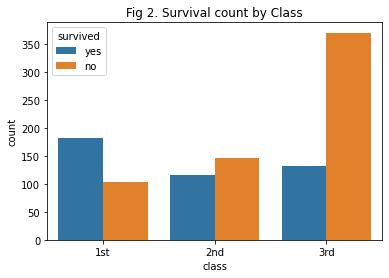

In [64]:
p = sns.countplot(data=titanic, x="class", hue="survived").set(title='Fig 2. Survival count by Class')

We can further see the interaction of passenger gender and class on survival.

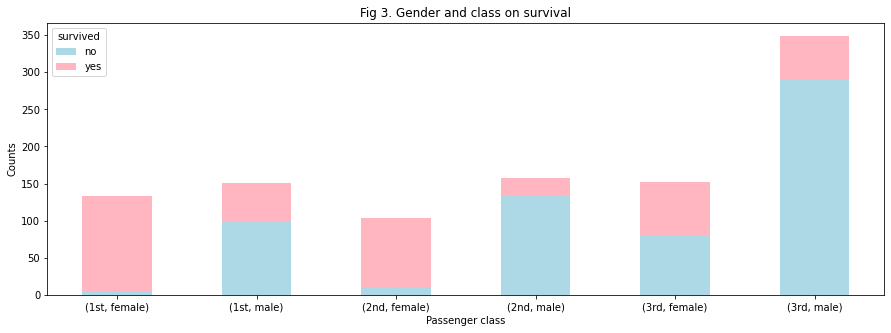

In [65]:
# Create grouped panda for plotting
titanic_barplot = grouped_titanic.plot.bar(stacked=True, color = ["lightblue", "lightpink"], 
figsize=(15,5), title="Fig 3. Gender and class on survival")
plt.ylabel("Counts")
plt.xlabel('Passenger class')
plt.xticks(rotation=0)
plt.show(titanic_barplot)

## Discussion ##

In this assignment, I explored data from the Titanic disaster, and focused on relationships between passenger sex and class on their suvival. An exploratory analysis supported the hypotheses that both sex and class were related to survival. I found that 1st class passengers had substantially higher rates of surival than 3rd class passengers. Similarly, female passengers had a higher rate of survival than male passengers. These analyses confirm widely reported trends on Titanic survial history. Age did not appear to affect passenger survival. These outcomes suggest that modern day passenger cruises should consider having adequate numbers of lifeboats to incease surival, and have well-practiced evaculation procedures in place to improve disparities, such as class and sex, on passenger survival.

## References
1. Source data - https://vincentarelbundock.github.io/Rdatasets/articles/data.html
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz 